In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv('AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.shape

(144, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# month column to datetime 
data['Month']=pd.to_datetime(data['Month'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
# always month will be in index 

In [10]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [11]:
data.index=data['Month']

In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
#data.set_index('Month',inplace = True)


In [14]:
#del
del data['Month']

In [15]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

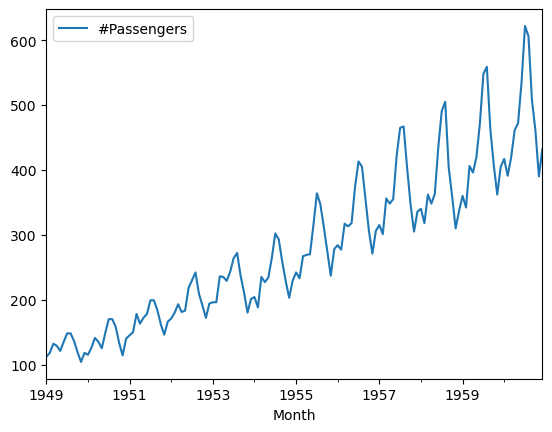

In [16]:
data.plot()

In [18]:
# checking if data is stationary
from statsmodels.tsa.stattools import adfuller

In [25]:
result=adfuller(data['#Passengers'])


In [20]:
pval=result[1]

In [21]:
pval

0.9918802434376409

In [26]:
# 0.99 >0.05 --> not stationary

In [27]:
rolling_mean=data.rolling(window=12).mean()

In [28]:
rolling_mean_detrended=data-rolling_mean

In [30]:
rolling_mean_detrended[:13]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


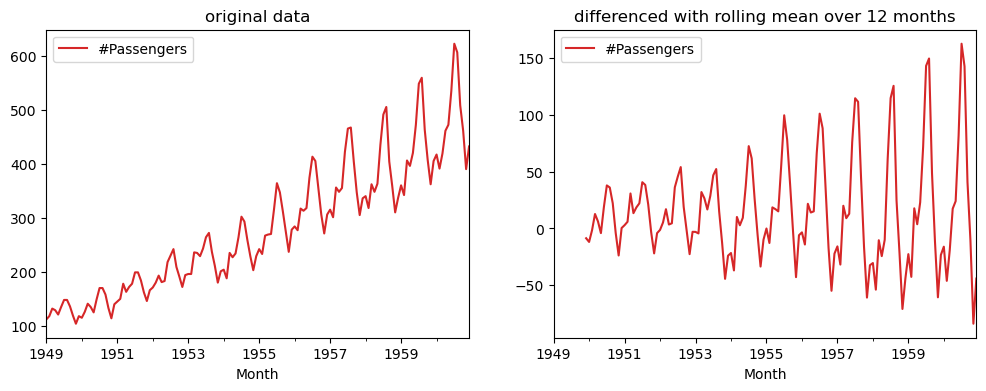

In [31]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red', title="differenced with rolling mean over 12 months",ax=ax1)

ax2=plt.subplot(1,2,1)
data.plot(figsize=(12,4),
         color="tab:red",
         title="original data", ax=ax2)
plt.show()

In [32]:
# trying to remove seasonality

In [33]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

In [34]:
rolling_mean_detrended[:13]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [36]:
rolling_mean_detrended.shift()[:13]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


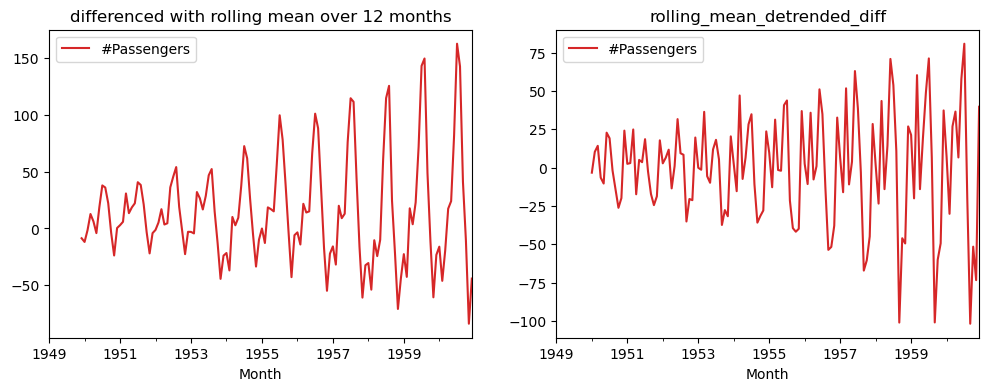

In [38]:
ax1=plt.subplot(1,2,1)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red', title="differenced with rolling mean over 12 months",ax=ax1)

ax2=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red', title="rolling_mean_detrended_diff",ax=ax2)

plt.show()

In [41]:
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()

In [42]:
result=adfuller(rolling_mean_detrended_diff['#Passengers'])
result[1]

0.022775264967860642

In [43]:
# 0.02<0.05 ----> stationary

In [45]:
m=rolling_mean_detrended_diff.rolling(window=12).mean()
s=rolling_mean_detrended_diff.rolling(window=12).std()

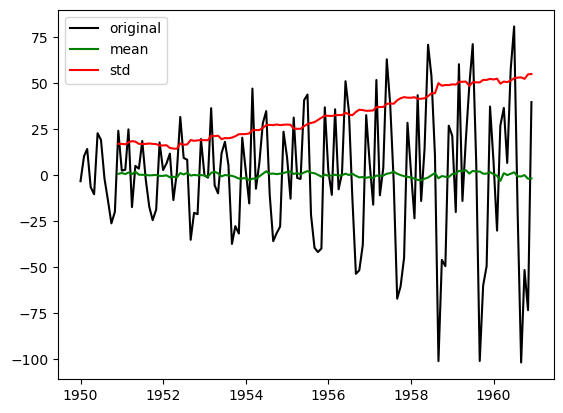

In [50]:
plt.plot(rolling_mean_detrended_diff,color='black',label='original')
plt.plot(m,color='green',label='mean')
plt.plot(s,color='red',label="std")
plt.legend(loc='best')
plt.show()